In [6]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import os
from os import listdir
from os.path import isfile, join
import pprint
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
from cnn_feature_extractor import CNNFeatureExtractor
feat_extractor = CNNFeatureExtractor()
#sift = cv2.SIFT_create()

Done Match
len match: 3025
len good : 294


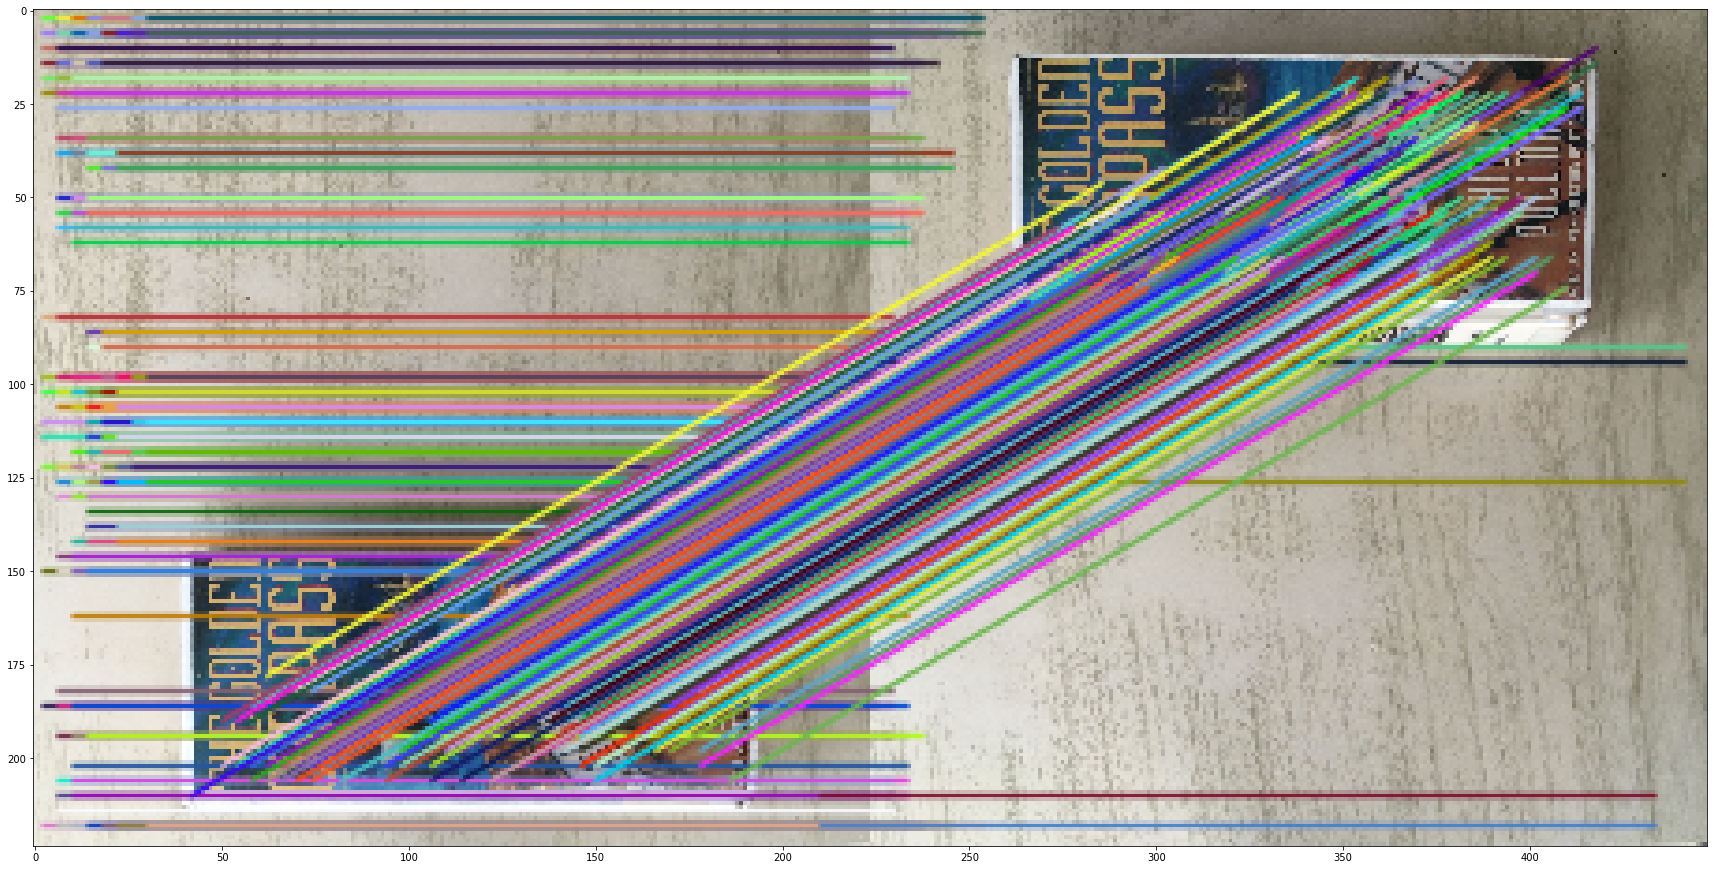

(<matplotlib.image.AxesImage at 0x1c5a4683310>, None)

In [227]:
data_path1= './test_imgs/new_livre1.jpg'   #'./SYS809_projet2022_sequences2/parcA-00.jpg'
data_path2 = './test_imgs/livre2.jpg' #'./SYS809_projet2022_sequences2/parcB-00.jpg'
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary


#img1 = i = feat_extractor.load_img(data_path1, [224,224], preprocess=False)
#img2 = feat_extractor.load_img(data_path2, [224,224], preprocess=False)
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


#kp1, des1 = sift.detectAndCompute(img1,None)
#kp2, des2 = sift.detectAndCompute(img2,None)

kp1,des1 = feat_extractor.get_keypoints_and_descriptors(data_path1)
kp2,des2 = feat_extractor.get_keypoints_and_descriptors(data_path2)
#print("Got kp1 and desc1", kp1.shape, des1.shape)
#print("Got kp2 and desc2", len(kp2), len(des2))

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

bf = cv2.BFMatcher(cv2.NORM_L2SQR)
#flann = cv2.FlannBasedMatcher(index_params,search_params)

#knnMatch retourne les 2 plus proche voisin pour chaque membre de des1
matches = bf.knnMatch(des1,des2,k=2)
#Les objects DMatch contiennent index de du point-cle de ds1 match dans le champ queryIdx
#et l'index du point-cle appartenant a des2 dans le champ trainIdx
print("Done Match")

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
print("len match:", len(matches))

# ratio test as per Lowe's paper,
good = []
for i,(m,n) in enumerate(matches):
    if m.distance < .7 * n.distance:
        good.append(m)
        matchesMask[i]=[1,0]
print("len good :" , len(good))

draw_params = dict(matchColor = -1, #(0,255,0),
                   singlePointColor = (0,0,0),
                   matchesMask = matchesMask,
                   flags = 4|2)

img1 = i = feat_extractor.load_img(data_path1, [224,224], preprocess=False)
img2 = feat_extractor.load_img(data_path2, [224,224], preprocess=False)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None, **draw_params )

plt.figure(figsize=(30, 30))
plt.imshow(img3),plt.show()

65.95188662180153


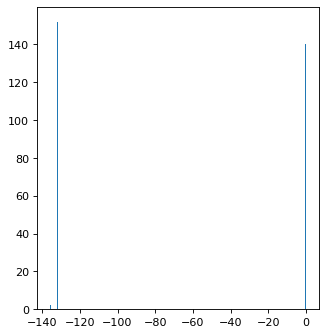

In [229]:
translations_x = []
translations_y = []
img1_pts = []
img2_pts = []
for m in good:


            
    img1_pts.append(kp1[m.queryIdx].pt)
    img2_pts.append(kp2[m.trainIdx].pt)
    '''  3. Trouver la translation entre ces points  '''
    translations_x.append( kp2[m.trainIdx].pt[0] - kp1[m.queryIdx].pt[0])
    translations_y.append( kp2[m.trainIdx].pt[1] - kp1[m.queryIdx].pt[1])


translations_y = np.array(translations_y)
#translations_y = translations_y[translations_y < -50]
plt.figure(figsize=(10,5), dpi=80)
plt.subplot(1,2,1)
plt.hist(translations_y, bins=224);
print(translations_y.std())

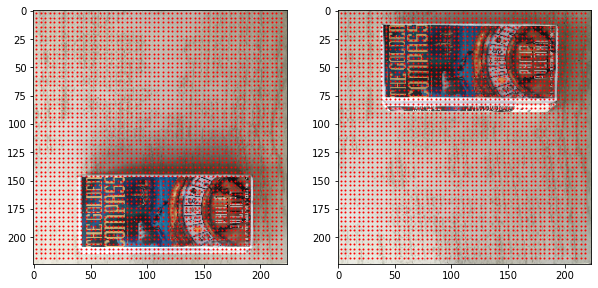

In [187]:

img1_pts = np.float32([ kp.pt for kp in kp1 ])
img2_pts = np.float32([ kp.pt for kp in kp2])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img1)
plt.scatter(list(list(zip(*img1_pts))[0]), list(list(zip(*img1_pts))[1]), s=[1], c='r')
plt.subplot(1,2,2)
plt.imshow(img2)
plt.scatter(list(list(zip(*img2_pts))[0]), list(list(zip(*img2_pts))[1]), s=[1], c='r')
plt.show()